This line mounts your Google Drive so that you can access files (like CSV datasets) stored in it. After running this, a URL will appear. Click it, allow access.

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing all the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Loads the house_price.csv file into a DataFrame called data.
pd.read_csv reads CSV files into a structured tabular format

In [6]:
# Load dataset
data=pd.read_csv('drive/My Drive/project_iitd/house_price.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18560,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
18561,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
18562,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
18563,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


Performing initial exploratory analysis of a dataset stored in the data DataFrame. It provides a quick overview of the structure, content, and quality of the data:

In [7]:
data.shape         # Number of rows and columns
data.info()        # Data types, nulls
data.head()        # Preview data
data.describe()    # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18565.000000,18565.000000,18565.000000,18565.000000,18376.000000,18565.000000,18565.000000,18565.000000,18565.000000
mean,-119.570116,35.633888,28.615890,2634.033827,537.711199,1426.223108,499.450902,3.867012,206617.794991
std,2.002922,2.137014,12.564224,2195.915548,424.125849,1142.570832,384.553175,1.895988,115447.104881
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,786.000000,279.000000,2.561200,119300.000000
50%,-118.500000,34.260000,29.000000,2123.000000,434.000000,1166.000000,408.000000,3.534100,179400.000000
75%,-118.010000,37.710000,37.000000,3141.000000,646.000000,1725.000000,603.000000,4.741100,264400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Drops the target column from the original dataset to get only input features x.
axis=1 means drop column, not row.

In [8]:
#Drop output column
x=data.drop(['median_house_value'], axis=1)
y=data['median_house_value']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
train_data=x_train.join(y_train)

--- Descriptive Statistics for All Numerical Features ---
                      count           mean            std         min  \
longitude           14852.0    -119.576398       2.003180   -124.3500   
latitude            14852.0      35.638597       2.136554     32.5400   
housing_median_age  14852.0      28.651899      12.530344      1.0000   
total_rooms         14852.0    2633.808376    2174.778534      2.0000   
total_bedrooms      14703.0     537.978372     421.651291      2.0000   
population          14852.0    1423.006935    1123.315534      3.0000   
households          14852.0     498.969768     381.721136      2.0000   
median_income       14852.0       3.872511       1.900423      0.4999   
median_house_value  14852.0  206967.802047  115447.726017  14999.0000   

                             25%          50%           75%          max  
longitude             -121.80000    -118.5100    -118.01000    -114.3100  
latitude                33.94000      34.2600      37.71250  

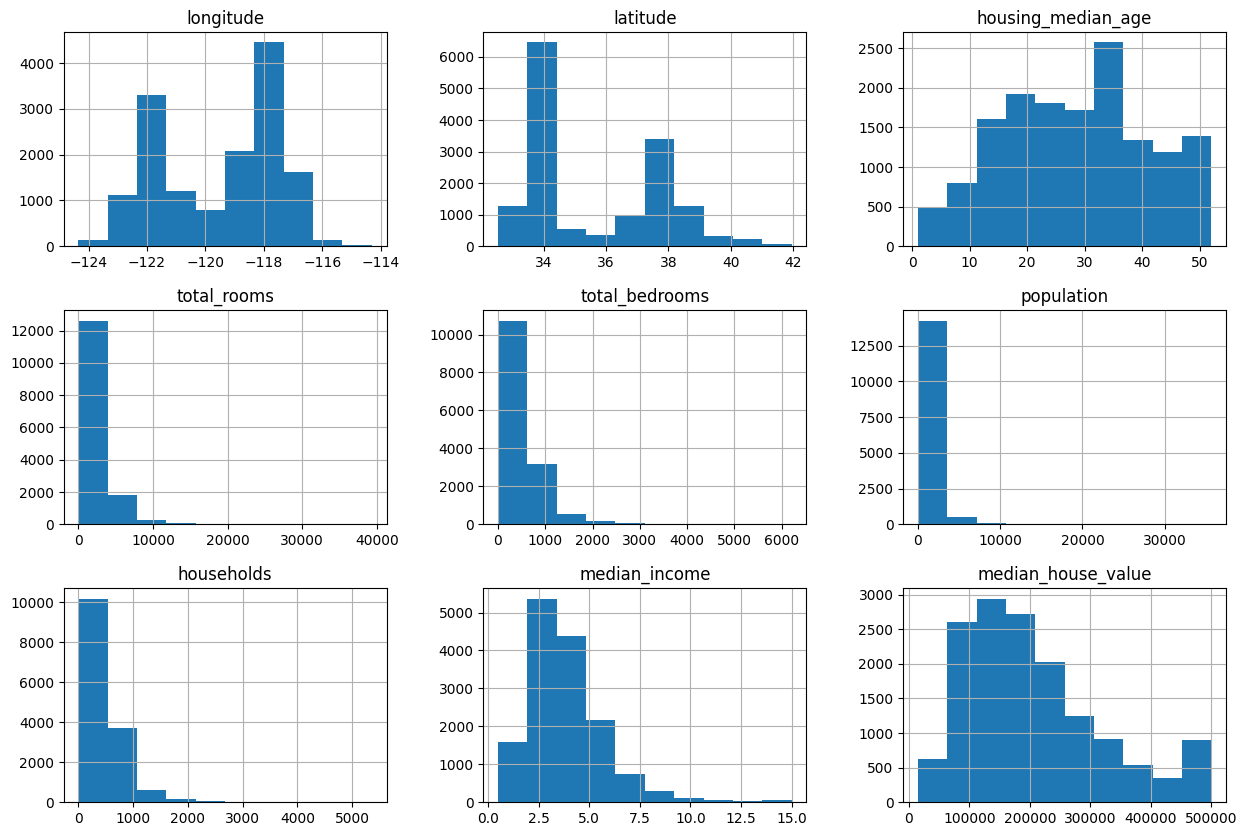

In [9]:
train_data.hist(figsize=(15, 10))
# --- Part 1: Descriptive Statistics ---
print("--- Descriptive Statistics for All Numerical Features ---")
# Select only numerical columns before calling describe()
numerical_train_data = train_data.select_dtypes(include=np.number)
print(numerical_train_data.describe().T)
print("-" * 50)

# --- Part 2: Skewness and Kurtosis ---
# This part of the code was already corrected and should work
print("\n--- Skewness and Kurtosis of Numerical Features ---")
skew_kurt_df = pd.DataFrame({
    'skewness': numerical_train_data.skew(),
    'kurtosis': numerical_train_data.kurt()
})
print(skew_kurt_df)
print("-" * 50)
# --- Part 3: Smoothed Density Plots (KDE Plots) ---
# This part of the code should also work correctly
# Let's check for the categorical columns too, to see if they're still in the data
categorical_cols = train_data.select_dtypes(include=['object', 'bool']).columns
print("\nNon-Numerical Columns:", categorical_cols)

# Plotting can be done on the full numerical data as before
interesting_cols = ['total_rooms', 'population', 'median_income', 'median_house_value']



longitude & latitude: These have relatively small values, indicating geographic distribution doesn’t vary drastically between the groups.
total_rooms, population, households: Very large values in column 2, suggesting high variability or extremely high values in one group.
median_income and median_house_value: Moderate positive values — these could be strong predictors of housing outcomes if this is a feature analysis.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

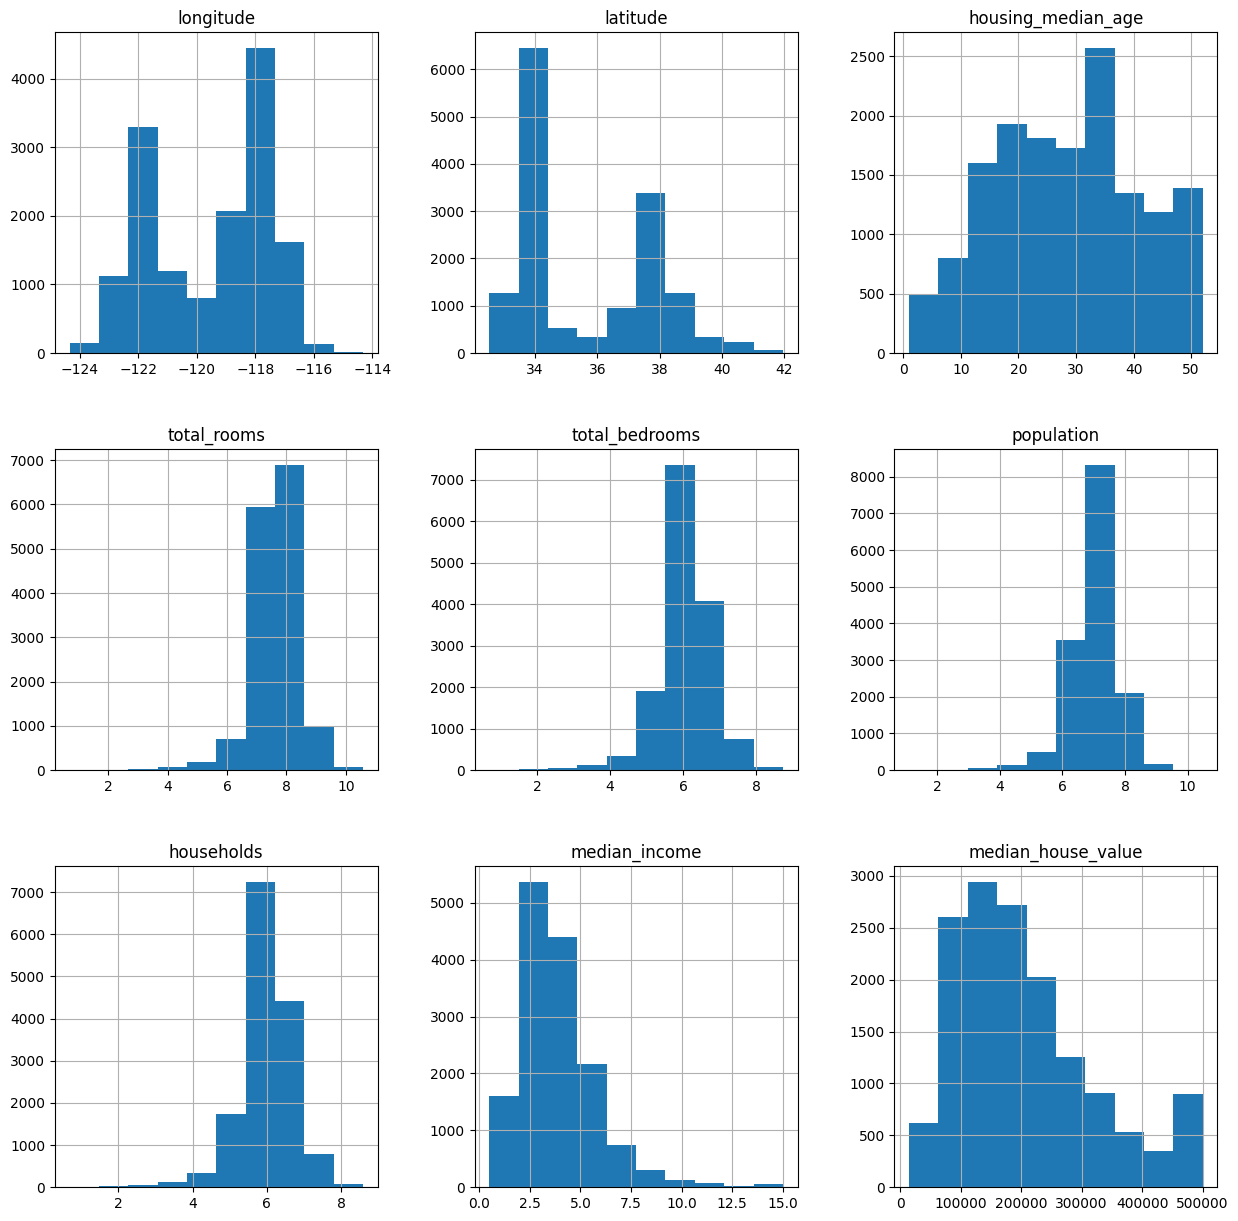

In [8]:
train_data['total_rooms']=np.log(train_data['total_rooms']*1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']*1)
train_data['population']=np.log(train_data['population']*1)
train_data['households']=np.log(train_data['households']*1)
train_data.hist(figsize=(15, 15))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15637,-120.44,34.96,29,7.772332,6.331502,7.388328,6.137727,2.6531,<1H OCEAN,108300
12085,-117.43,34.09,18,8.062118,6.448889,7.390799,6.350886,2.7437,INLAND,120200
7945,-118.36,34.09,34,7.948738,6.783325,7.374002,6.736967,1.7558,<1H OCEAN,312500
14227,-122.42,37.75,52,7.655391,6.269096,7.112327,6.240276,3.5536,NEAR BAY,400000
4472,-118.30,34.00,52,7.258412,5.872118,6.984716,5.866468,1.5179,<1H OCEAN,116100
...,...,...,...,...,...,...,...,...,...,...
11284,-121.50,38.54,52,7.043160,4.890349,5.811141,4.927254,8.3380,INLAND,405800
11964,-117.61,34.09,23,7.573017,5.891644,7.301822,5.948035,4.4205,INLAND,135500
5390,-117.75,34.09,36,8.037220,6.320768,7.421776,6.300786,4.2143,INLAND,146900
860,-121.92,37.64,46,7.154615,5.342334,6.238325,5.337538,5.1406,INLAND,315600


<Axes: >

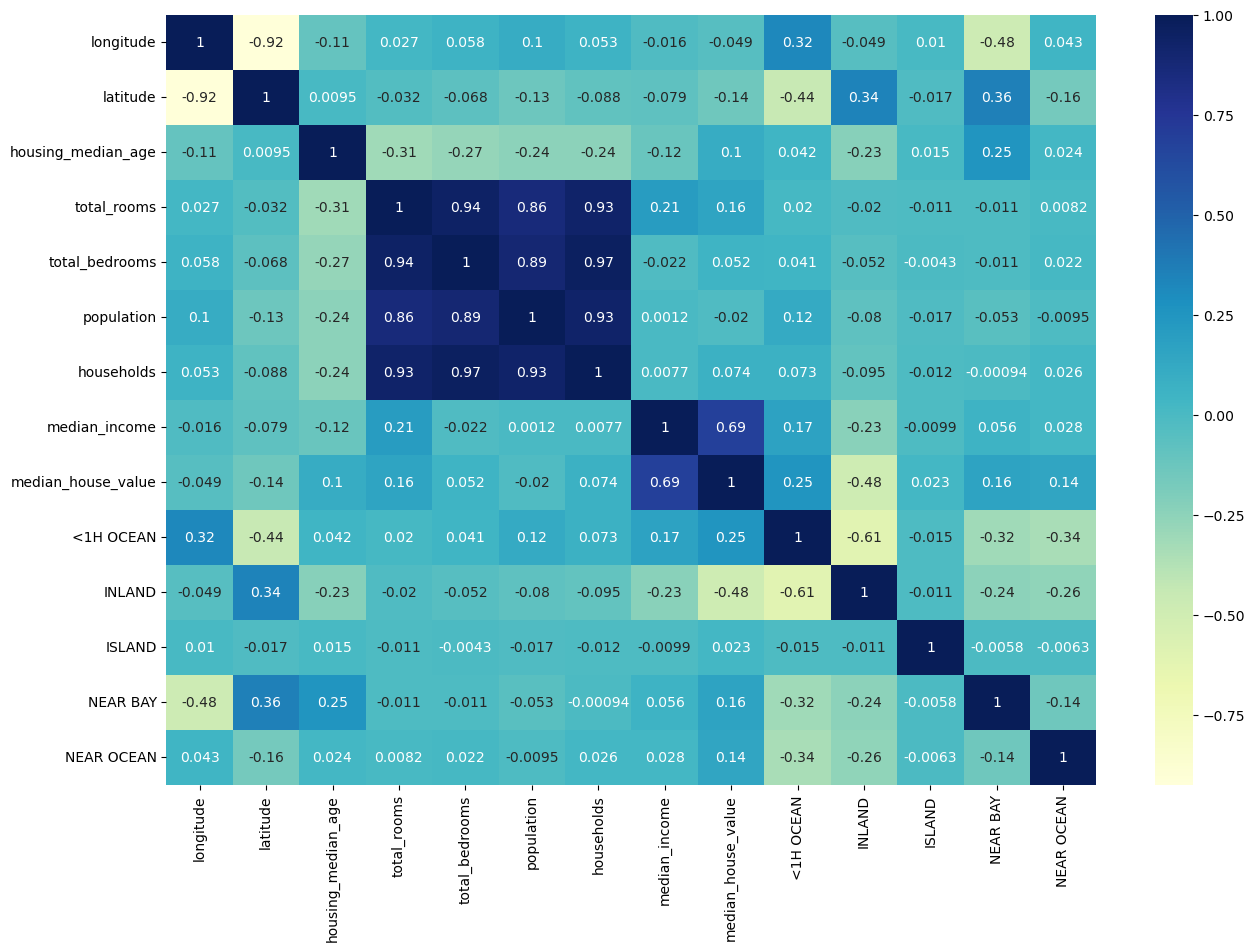

In [ ]:
plt.figure(figsize=(15, 10))

# Create heatmap on correlation matrix
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

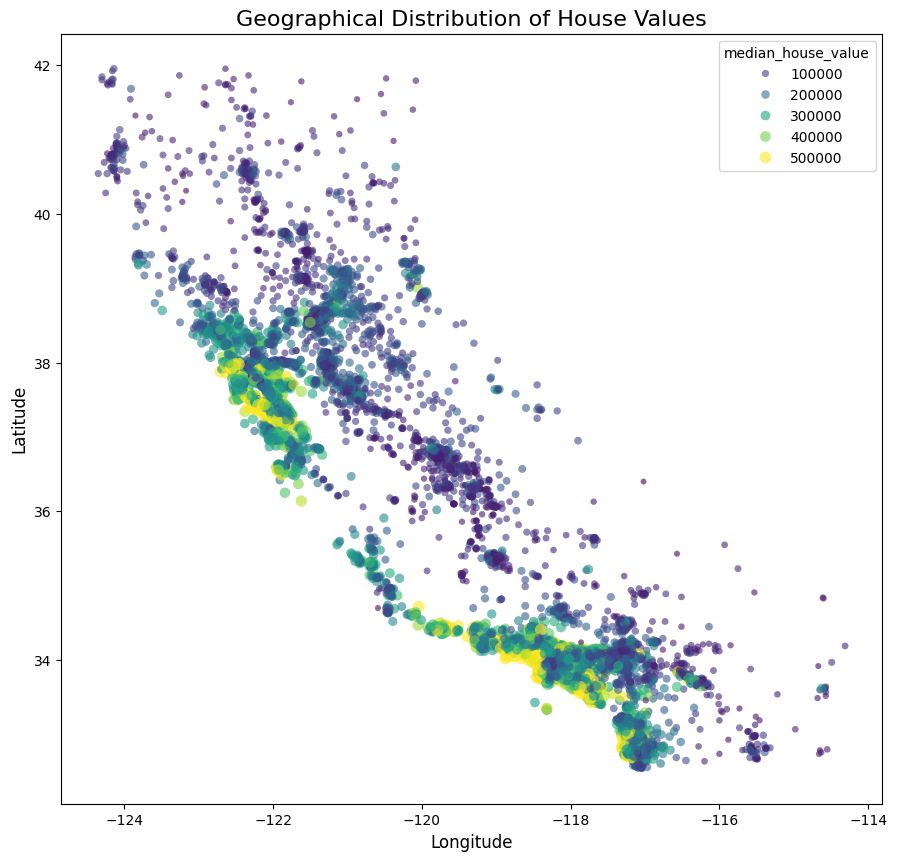

In [23]:
# Scatter plot using latitude and longitude
plt.figure(figsize=(12, 10))

# Create the scatter plot with hue for median house value
sns.scatterplot(
    x="longitude",
    y="latitude",
    data=train_data,
    hue="median_house_value",
    palette="viridis",  # Use a different palette for clarity
    size="median_house_value", # Add point size as another visual cue
    alpha=0.6,
    edgecolor='none'
)

# Add a title and labels
plt.title('Geographical Distribution of House Values', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Set the aspect ratio to make the plot look like a map
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = data.drop('median_house_value', axis=1)
# Count of rows with any NaN values
#For few records total_bedrooms column has Null values
count_nan_rows = data.isnull().any(axis=1).sum()
print("Number of rows with missing values:", count_nan_rows)


Number of rows with missing values: 189


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("ocean_proximity", OneHotEncoder(),[-1])], remainder="passthrough")
x_new = ct.fit_transform(x)
x_new
from sklearn.impute import KNNImputer
x_df = pd.DataFrame(x_new)

#Apply KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_imputed = imputer.fit_transform(x_df)
#Confirms if any NaN values are still present.
import numpy as np
nan_count = np.isnan(x_imputed).sum()
print("Total missing (NaN) values:", nan_count)

Total missing (NaN) values: 0


In [11]:
y = data['median_house_value']
y

,median_house_value
0,452600
1,358500
2,342200
3,269700
4,299200
...,...
18560,78100
18561,77100
18562,92300
18563,84700


In [14]:
# Data Imputation with median

# Calculate the median first
median_bedrooms = data['total_bedrooms'].median()

# Fill the missing values and assign the result back to the column
data['total_bedrooms'] = data['total_bedrooms'].fillna(median_bedrooms)

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Log transform the target variable to handle capping and skewness
y_transformed = np.log(y + 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

# Create a transformer to apply log scaling to skewed numerical features
log_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

# Create a transformer for other numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log_num', log_transformer, ['total_rooms', 'total_bedrooms', 'population', 'households']),
        ('num', numerical_transformer, ['longitude', 'latitude', 'housing_median_age', 'median_income']),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 14852, number of used features: 12
[LightGBM] [Info] Start training from score 12.085356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- LightGBM Regressor Model Results ---
R-squared: 0.8359
MSE: 2186917922.29
RMSE: 46764.49


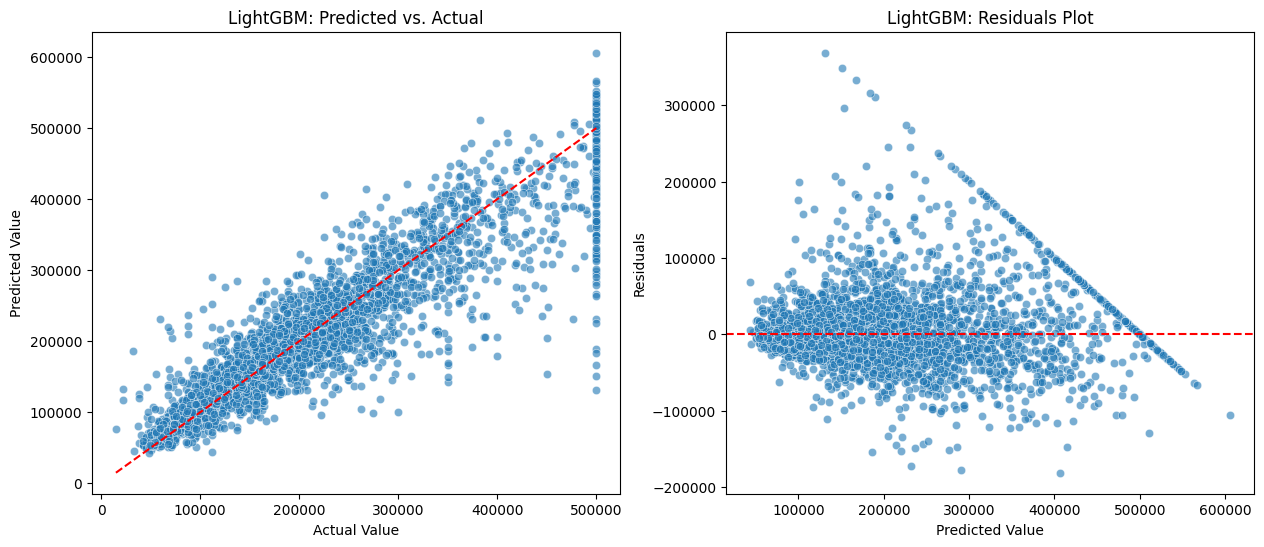

In [23]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Create the LightGBM model within the pipeline
# Note: You can also use 'XGBRegressor' from xgboost here
lgbm_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05,
                                                             num_leaves=31, max_depth=8,
                                                             random_state=42))])

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm_transformed = lgbm_model.predict(X_test)

# Convert predictions and actuals back to original scale for evaluation
y_pred_lgbm = np.expm1(y_pred_lgbm_transformed)
y_test_original = np.expm1(y_test)

# Evaluate the model
mse_lgbm = mean_squared_error(y_test_original, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test_original, y_pred_lgbm)

print("--- LightGBM Regressor Model Results ---")
print(f"R-squared: {r2_lgbm:.4f}")
print(f"MSE: {mse_lgbm:.2f}")
print(f"RMSE: {rmse_lgbm:.2f}")

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x=y_test_original, y=y_pred_lgbm, ax=axes[0], alpha=0.6)
axes[0].plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='red', linestyle='--')
axes[0].set_title('LightGBM: Predicted vs. Actual')
axes[0].set_xlabel('Actual Value')
axes[0].set_ylabel('Predicted Value')

residuals_lgbm = y_test_original - y_pred_lgbm
sns.scatterplot(x=y_pred_lgbm, y=residuals_lgbm, ax=axes[1], alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('LightGBM: Residuals Plot')
axes[1].set_xlabel('Predicted Value')
axes[1].set_ylabel('Residuals')
plt.show()


--- Random Forest Regressor Model Results ---
R-squared: 0.8197
MSE: 2403090599.25
RMSE: 49021.33


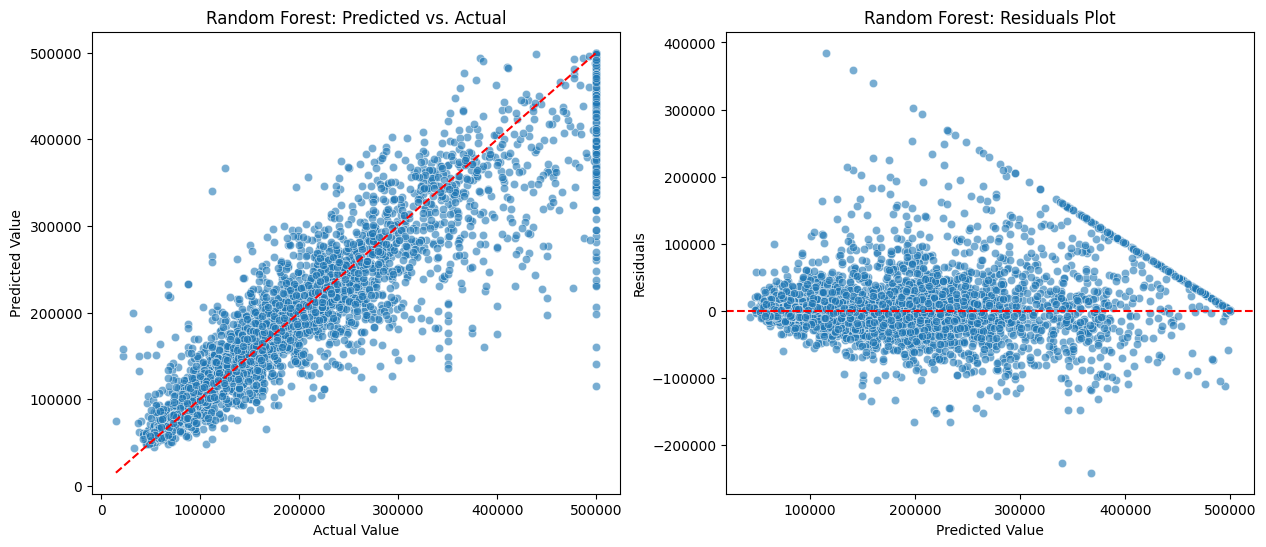

In [19]:
#Create the Random Forest Regressor model within the pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_transformed = rf_model.predict(X_test)

# Convert predictions back to original scale
y_pred_rf = np.expm1(y_pred_rf_transformed)
y_test_original = np.expm1(y_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test_original, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_original, y_pred_rf)

print("\n--- Random Forest Regressor Model Results ---")
print(f"R-squared: {r2_rf:.4f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x=y_test_original, y=y_pred_rf, ax=axes[0], alpha=0.6)
axes[0].plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='red', linestyle='--')
axes[0].set_title('Random Forest: Predicted vs. Actual')
axes[0].set_xlabel('Actual Value')
axes[0].set_ylabel('Predicted Value')

residuals_rf = y_test_original - y_pred_rf
sns.scatterplot(x=y_pred_rf, y=residuals_rf, ax=axes[1], alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Random Forest: Residuals Plot')
axes[1].set_xlabel('Predicted Value')
axes[1].set_ylabel('Residuals')
plt.show()#

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': [0.8, 1.0, 'sqrt'],
    'regressor__max_depth': [10, 20, None],
}

# Assuming 'rf_model' is your Pipeline from before
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best R-squared: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

                       Feature  Importance
7                   households    0.349526
9       ocean_proximity_INLAND    0.317506
5               total_bedrooms    0.104542
4                  total_rooms    0.091512
6                   population    0.035256
2           housing_median_age    0.032024
0                    longitude    0.023606
1                     latitude    0.020831
3                median_income    0.018351
12  ocean_proximity_NEAR OCEAN    0.004075
8    ocean_proximity_<1H OCEAN    0.002221
11    ocean_proximity_NEAR BAY    0.000384
10      ocean_proximity_ISLAND    0.000167


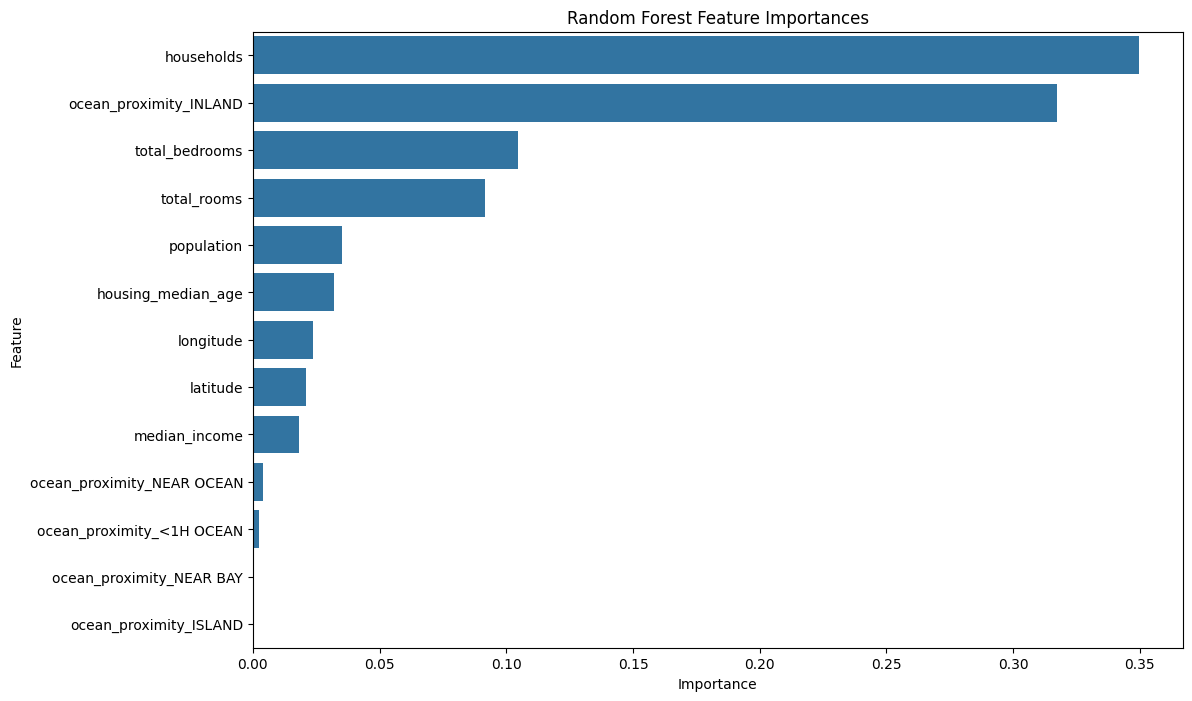

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# 1. Get the preprocessor from the pipeline
preprocessor = rf_model.named_steps['preprocessor']

# 2. Get the feature names for the non-transformed numerical features
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'median_income']

# 3. Get the feature names for the log-transformed features
log_transformed_features = ['total_rooms', 'total_bedrooms', 'population', 'households']

# 4. Get the feature names for the one-hot encoded features
# We access the 'cat' transformer directly from the preprocessor to get its names
one_hot_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# 5. Combine all feature names into a single list
feature_names = numerical_features + log_transformed_features + list(one_hot_features)

# --- End of corrected section ---

# 6. Get the feature importances from the regressor
feature_importances = rf_model.named_steps['regressor'].feature_importances_

# 7. Create a DataFrame to view them easily
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# 8. Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importances')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 14852, number of used features: 12
[LightGBM] [Info] Start training from score 12.085356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- LightGBM Regressor Model Results ---
R-squared: 0.8359
MSE: 2186917922.29
RMSE: 46764.49


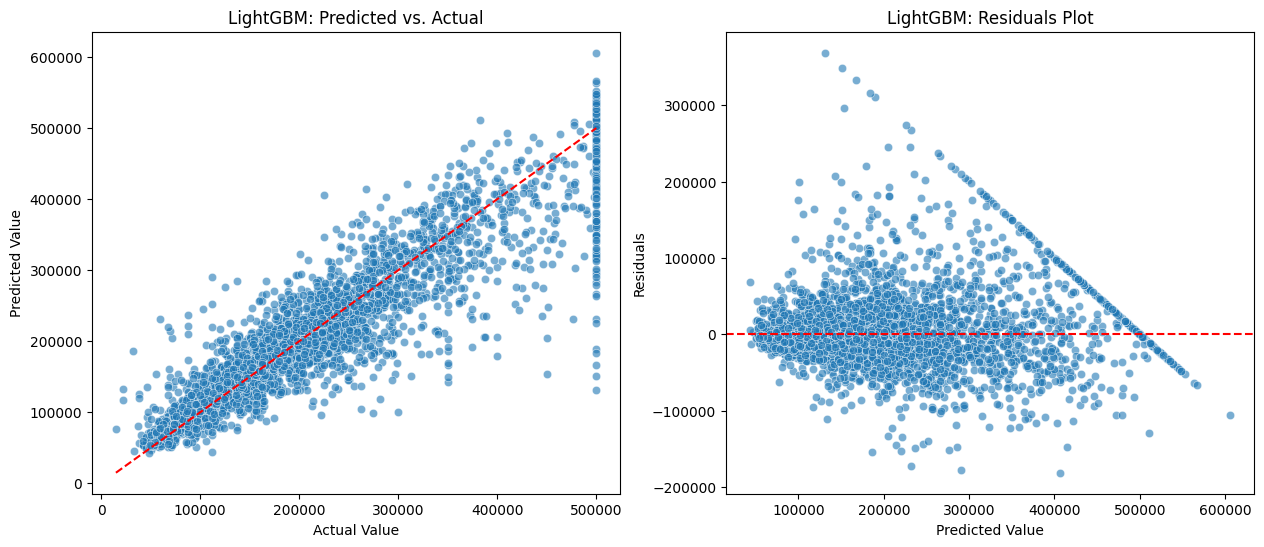